shortcuts & magics

function + P --command pallete

shitf + tab -- command/object documentation

%matplotlib notebook

%ls magic

In [1]:
%reset #clear namespace in dictionary

Once deleted, variables cannot be recovered. Proceed (y/[n])? y
Don't know how to reset  #clear, please run `%reset?` for details
Don't know how to reset  namespace, please run `%reset?` for details
Flushing input history
Don't know how to reset  dictionary, please run `%reset?` for details


In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

/home/arturo/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [3]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("/tmp/data/", one_hot = True)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use urllib or similar directly.
Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting /tmp/data/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting /tmp/data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting /tmp/data/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting /tmp/data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from t

In [4]:
#for loop
for i in range(5): #range resets the value of i to the next in the arange setup even if it's modified in the loop
    # for loop does not just add one every iteration
    print(i)
    i=i+1
    print(i)

0
1
1
2
2
3
3
4
4
5


In [5]:
#printing
damage=10
print('The enemy gets hit for %d hitpoints' % damage)
print('The enemy gets hit for ' + str(damage) + ' hitpoints')
print('The enemy gets hit for {} hitpoints'.format(damage))
print("The enemy gets hit for %d hitpoints" % damage) # " and ' are interchangable

The enemy gets hit for 10 hitpoints
The enemy gets hit for 10 hitpoints
The enemy gets hit for 10 hitpoints
The enemy gets hit for 10 hitpoints


In [6]:
#numpy arrays 
t1=np.array([1,1]) #vectors
t2=np.array([2,2,3])
t3=np.array([[1,1]]) #1x2 matrix
t4=np.array([[1,2,3],[4,5,6]]) #2x3 matrix
list=[t1,t2,t3,t4]
for (i,array) in enumerate(list):
    print("t_%d" %i,"=",array,"\t size=",array.size,"\t shape=",array.shape,"\t type=",type(array))
print("multiplication= \t",np.matmul(t3,t4))
print("zeros= \t",np.zeros([2,3]))
print("ones= \t",np.ones([3,2]))

t_0 = [1 1] 	 size= 2 	 shape= (2,) 	 type= <class 'numpy.ndarray'>
t_1 = [2 2 3] 	 size= 3 	 shape= (3,) 	 type= <class 'numpy.ndarray'>
t_2 = [[1 1]] 	 size= 2 	 shape= (1, 2) 	 type= <class 'numpy.ndarray'>
t_3 = [[1 2 3]
 [4 5 6]] 	 size= 6 	 shape= (2, 3) 	 type= <class 'numpy.ndarray'>
multiplication= 	 [[5 7 9]]
zeros= 	 [[0. 0. 0.]
 [0. 0. 0.]]
ones= 	 [[1. 1.]
 [1. 1.]
 [1. 1.]]


In [7]:
#opening and closing a session
sess=tf.Session(config=tf.ConfigProto(log_device_placement=True)) 
#log_device_placement outputs to the terminal the device used for each operation 
#allow_soft_placement changes operation to cpu when it can't ve run in gpu and ¿viceversa?
#tf.InteractiveSession() initiates a session but installs itself as default session as well
print("1.-",sess.run(tf.zeros([2,3])))
sess.close()

with tf.Session() as sess: #automatically opens and closes a session
#also automatically installs itself as default which is why Interactive session is not use on "with" context
    test=tf.placeholder(tf.float32)
    print("2.-",test.eval(feed_dict={test:3})) 
    print("2.-",sess.run(tf.zeros([2,3])))
    
sess=tf.InteractiveSession()
print("3.-",sess.run(tf.constant([1,2,3],shape=[1,3])))
sess.close()

1.- [[0. 0. 0.]
 [0. 0. 0.]]
2.- 3.0
2.- [[0. 0. 0.]
 [0. 0. 0.]]
3.- [[1 2 3]]


In [8]:
#tf constants
a0 = tf.constant([1.0, 2.0, 3.0, 4.0, 5.0, 6.0], shape=[2, 3], name='a')
b0 = tf.constant([1.0, 2.0, 3.0, 4.0, 5.0, 6.0], shape=[3, 2], name='b')
c0 = tf.matmul(a0, b0)
d0 = tf.matmul(b0,a0)
#e = tf.matmul(d,c) throws a dimension error, even if calculation is not run
f0 = tf.zeros([2,3])

k0=tf.constant(1)
l0=tf.constant(2)
p0=tf.multiply(l0,k0)
#sess.run(p0) #fails as session is closed

print("------------------using with context ----------------------------")
with tf.Session() as sess:
    print(sess.run(p0)) #constant
    print(sess.run(c0)) #(2x3)*(3x2)=(2x2)
    print(sess.run(d0)) #(3x2)*(2x3)=(3x3)
    ans=sess.run(c0)
    print("ans is:",type(ans),ans.size,ans.shape)
    print("c0 is:",type(c0),"\n",c0.eval,"\n",c0.shape,"\n",tf.rank(c0))
    print("evaluated zero tensor =",sess.run(f0))
    sess.run(tf.zeros([10],dtype=tf.float64))
#sess.run(tf.zeros([10],dtype=tf.float64)) if a session is launched here it returns an error
print("-------------------explicit open/close---------------------------")
sess = tf.Session(config=tf.ConfigProto(log_device_placement=True))
print(sess.run(p0))
print(sess.run(c0)) #(2x3)*(3x2)=(2x2)
print(sess.run(d0)) #(3x2)*(2x3)=(3x3)
sess.run(tf.zeros([10],dtype=tf.float64))
sess.close()

------------------using with context ----------------------------
2
[[22. 28.]
 [49. 64.]]
[[ 9. 12. 15.]
 [19. 26. 33.]
 [29. 40. 51.]]
ans is: <class 'numpy.ndarray'> 4 (2, 2)
c0 is: <class 'tensorflow.python.framework.ops.Tensor'> 
 <bound method Tensor.eval of <tf.Tensor 'MatMul:0' shape=(2, 2) dtype=float32>> 
 (2, 2) 
 Tensor("Rank:0", shape=(), dtype=int32)
evaluated zero tensor = [[0. 0. 0.]
 [0. 0. 0.]]
-------------------explicit open/close---------------------------
2
[[22. 28.]
 [49. 64.]]
[[ 9. 12. 15.]
 [19. 26. 33.]
 [29. 40. 51.]]


In [9]:
#tf placeholders
with tf.Session() as sess:
    p = tf.placeholder(tf.float32)
    t = p + 1.5
    #t.eval()  # This will fail, since the placeholder did not get a value.
    print("p=",t.eval(session=sess,feed_dict={p:2.0}))  # This will succeed because we're feeding a value to the placeholder.

a0 = tf.constant([1.0, 2.0, 3.0, 4.0, 5.0, 6.0], shape=[2, 3], name='a')
bp=tf.placeholder(shape=[2,3],dtype=tf.float64)
#sess.run(b) this fails as it need to be fed a value
#b.eval(session=sess,feed_dict={b:a}) #it fails as it cannot be fed a tf tensor
sess = tf.Session(config=tf.ConfigProto(log_device_placement=True))
print("bp=",bp.eval(session=sess,feed_dict={bp:np.zeros((2,3))})) #success
sess.close()

p= 3.5
bp= [[0. 0. 0.]
 [0. 0. 0.]]


In [10]:
#tf variables
a=tf.Variable([[7],[11]], tf.int32)
#sess.run(a) #this fails as it needs to be initialized
with tf.Session() as sess:
    tf.global_variables_initializer().run()
    print(sess.run(a))
#sess.run(a) #this fails as the session is already closed

[[ 7]
 [11]]


In [2]:
# Creates a graph with operations performed on specified device
#with tf.device('/cpu:0'):
with tf.device('/device:GPU:0'):    
    a = tf.constant([1.0, 2.0, 3.0, 4.0, 5.0, 6.0], shape=[2, 3], name='a')
    b = tf.constant([1.0, 2.0, 3.0, 4.0, 5.0, 6.0], shape=[3, 2], name='b')
    c = tf.matmul(a, b)
# Creates a session with log_device_placement set to True.
sess = tf.Session(config=tf.ConfigProto(log_device_placement=True))
# Runs the operation
print(sess.run(c))
sess.close()

InvalidArgumentError: Cannot assign a device for operation 'MatMul': Operation was explicitly assigned to /device:GPU:0 but available devices are [ /job:localhost/replica:0/task:0/device:CPU:0 ]. Make sure the device specification refers to a valid device.
	 [[Node: MatMul = MatMul[T=DT_FLOAT, transpose_a=false, transpose_b=false, _device="/device:GPU:0"](a, b)]]

Caused by op 'MatMul', defined at:
  File "/home/arturo/anaconda3/lib/python3.6/runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "/home/arturo/anaconda3/lib/python3.6/runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "/home/arturo/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "/home/arturo/anaconda3/lib/python3.6/site-packages/traitlets/config/application.py", line 658, in launch_instance
    app.start()
  File "/home/arturo/anaconda3/lib/python3.6/site-packages/ipykernel/kernelapp.py", line 478, in start
    self.io_loop.start()
  File "/home/arturo/anaconda3/lib/python3.6/site-packages/zmq/eventloop/ioloop.py", line 177, in start
    super(ZMQIOLoop, self).start()
  File "/home/arturo/anaconda3/lib/python3.6/site-packages/tornado/ioloop.py", line 888, in start
    handler_func(fd_obj, events)
  File "/home/arturo/anaconda3/lib/python3.6/site-packages/tornado/stack_context.py", line 277, in null_wrapper
    return fn(*args, **kwargs)
  File "/home/arturo/anaconda3/lib/python3.6/site-packages/zmq/eventloop/zmqstream.py", line 440, in _handle_events
    self._handle_recv()
  File "/home/arturo/anaconda3/lib/python3.6/site-packages/zmq/eventloop/zmqstream.py", line 472, in _handle_recv
    self._run_callback(callback, msg)
  File "/home/arturo/anaconda3/lib/python3.6/site-packages/zmq/eventloop/zmqstream.py", line 414, in _run_callback
    callback(*args, **kwargs)
  File "/home/arturo/anaconda3/lib/python3.6/site-packages/tornado/stack_context.py", line 277, in null_wrapper
    return fn(*args, **kwargs)
  File "/home/arturo/anaconda3/lib/python3.6/site-packages/ipykernel/kernelbase.py", line 283, in dispatcher
    return self.dispatch_shell(stream, msg)
  File "/home/arturo/anaconda3/lib/python3.6/site-packages/ipykernel/kernelbase.py", line 233, in dispatch_shell
    handler(stream, idents, msg)
  File "/home/arturo/anaconda3/lib/python3.6/site-packages/ipykernel/kernelbase.py", line 399, in execute_request
    user_expressions, allow_stdin)
  File "/home/arturo/anaconda3/lib/python3.6/site-packages/ipykernel/ipkernel.py", line 208, in do_execute
    res = shell.run_cell(code, store_history=store_history, silent=silent)
  File "/home/arturo/anaconda3/lib/python3.6/site-packages/ipykernel/zmqshell.py", line 537, in run_cell
    return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
  File "/home/arturo/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 2728, in run_cell
    interactivity=interactivity, compiler=compiler, result=result)
  File "/home/arturo/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 2850, in run_ast_nodes
    if self.run_code(code, result):
  File "/home/arturo/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 2910, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-2-381c2d81ffee>", line 6, in <module>
    c = tf.matmul(a, b)
  File "/home/arturo/anaconda3/lib/python3.6/site-packages/tensorflow/python/ops/math_ops.py", line 2122, in matmul
    a, b, transpose_a=transpose_a, transpose_b=transpose_b, name=name)
  File "/home/arturo/anaconda3/lib/python3.6/site-packages/tensorflow/python/ops/gen_math_ops.py", line 4279, in mat_mul
    name=name)
  File "/home/arturo/anaconda3/lib/python3.6/site-packages/tensorflow/python/framework/op_def_library.py", line 787, in _apply_op_helper
    op_def=op_def)
  File "/home/arturo/anaconda3/lib/python3.6/site-packages/tensorflow/python/framework/ops.py", line 3392, in create_op
    op_def=op_def)
  File "/home/arturo/anaconda3/lib/python3.6/site-packages/tensorflow/python/framework/ops.py", line 1718, in __init__
    self._traceback = self._graph._extract_stack()  # pylint: disable=protected-access

InvalidArgumentError (see above for traceback): Cannot assign a device for operation 'MatMul': Operation was explicitly assigned to /device:GPU:0 but available devices are [ /job:localhost/replica:0/task:0/device:CPU:0 ]. Make sure the device specification refers to a valid device.
	 [[Node: MatMul = MatMul[T=DT_FLOAT, transpose_a=false, transpose_b=false, _device="/device:GPU:0"](a, b)]]


In [3]:
#with tf.device('device:GPU:0'):
with tf.device('device:CPU:0'):
    W = tf.Variable(np.ones([3,10]))
    bv = tf.Variable(np.ones([3]))
    x=tf.placeholder(shape=[10,1],dtype=tf.float64)
    y=tf.matmul(W,x)
    print(y.shape,bv.shape)

with tf.Session(config=tf.ConfigProto(log_device_placement=True)) as sess:
    tf.global_variables_initializer().run()
    yres=sess.run(y,feed_dict={x:np.ones((10,1))})
    bres=sess.run(bv)
    print(yres,bres)

(3, 1) (3,)
[[10.]
 [10.]
 [10.]] [1. 1. 1.]


In [4]:
#addig vector to a matrix (through broadcasting)
#turns out that you can add a vector, elementwise, to a matrix but only adding horizontally through each row
#you also can't transpose a vector of shape=[l] (only one index)
#to add vectors vertically you need to transpose the matrix, add, and transpose again
mat=tf.ones((3,2))
vec=tf.constant([1.,2.],shape=[2])
vec2=tf.constant([1.,2.,3.],shape=[3])
sum1=vec+mat
sum2=tf.transpose(vec2+tf.transpose(mat))
sum3=tf.add(vec,mat) #same as 1,adding vec2 would fail as the addition is done over the other dimention 
with tf.Session() as sess:
    print(sess.run(vec),sess.run(vec2),vec.shape,mat.shape)
    print("--------------------")
    print("mat=",sess.run(mat))
    print("s1=",sess.run(sum1),"\n s2=",sess.run(sum2),"\n s3=",sess.run(sum3))

[1. 2.] [1. 2. 3.] (2,) (3, 2)
--------------------
mat= [[1. 1.]
 [1. 1.]
 [1. 1.]]
s1= [[2. 3.]
 [2. 3.]
 [2. 3.]] 
 s2= [[2. 2.]
 [3. 3.]
 [4. 4.]] 
 s3= [[2. 3.]
 [2. 3.]
 [2. 3.]]


In [5]:
#example of adding vector and matrix
x = tf.placeholder(tf.float32, [100, 784])
W = tf.Variable(tf.ones([10,784]))
b = tf.Variable(tf.ones([10]))
prod=tf.matmul(W,x,transpose_b=True)
y=tf.transpose(tf.transpose(prod)+ b)
#d = b + tf.matmul(W,x,transpose_b=True)
sess = tf.InteractiveSession()
tf.global_variables_initializer().run()
#batch_xs, batch_ys = mnist.train.next_batch(100)
#print(sess.run(y, feed_dict={x: np.ones((100,784))}))
#print(sess.run(y, feed_dict={x: np.ones((100,784))}))
print(prod.shape,y.shape,b.shape)
sess.close()

(10, 100) (10, 100) (10,)


In [6]:
#softmax normalization on matrices
A=tf.constant([1.,2.,3.,1.,2.,3.],shape=[2,3])
B=tf.constant([1.,2.,3.,4.],shape=[4])
C=tf.constant([1.,2.],shape=[1,2])
D=tf.constant([1.,2.],shape=[2,1])
with tf.Session() as sess:
    print(A.eval(),"\n",B.eval())
    print(tf.nn.softmax(A).eval())
    print(tf.nn.softmax(B).eval())
    print(tf.nn.softmax(C).eval())
    print(tf.nn.softmax(D).eval())

[[1. 2. 3.]
 [1. 2. 3.]] 
 [1. 2. 3. 4.]
[[0.09003057 0.24472848 0.66524094]
 [0.09003057 0.24472848 0.66524094]]
[0.0320586  0.08714432 0.23688284 0.6439143 ]
[[0.26894143 0.7310586 ]]
[[1.]
 [1.]]


In [7]:
argmax=tf.argmax(tf.constant([1,2,7,8,-3,2,4,3],shape=[2,4]),1) #returns index of maximum value across direction 1
equal=tf.equal(tf.constant([1,2,3]),tf.constant([3,2,1])) #outputs boolean np.array
cast=tf.cast(np.array([True,False]),tf.float32) #converts boolean np.array to numerical array of 1's and 0's
with tf.Session() as sess:
    print(sess.run(argmax),type(sess.run(argmax)),sess.run(argmax).shape)
    print(sess.run(equal),type(sess.run(equal)),sess.run(equal).shape)
    print(sess.run(cast))

[3 2] <class 'numpy.ndarray'> (2,)
[False  True False] <class 'numpy.ndarray'> (3,)
[1. 0.]


In [8]:
%reset #clear namespace in dictionary

Once deleted, variables cannot be recovered. Proceed (y/[n])? y
Don't know how to reset  #clear, please run `%reset?` for details
Don't know how to reset  namespace, please run `%reset?` for details
Flushing input history
Don't know how to reset  dictionary, please run `%reset?` for details


In [9]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [10]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("/tmp/data/", one_hot = True)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting /tmp/data/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting /tmp/data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting /tmp/data/t10k-images-idx3-ubyte.gz
Extracting /tmp/data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


In [11]:
X = tf.placeholder(tf.float32, [None, 784]) #example vectors are horizontal here so we'll transpose it on multiplication
W = tf.Variable(tf.zeros([10,784]))
b = tf.Variable(tf.zeros([10]))
prod=tf.matmul(W,X,transpose_b=True)
sumation=tf.transpose(tf.transpose(prod) + b) #add b vertically (column by column) to the matrix
Ymod = tf.nn.softmax(tf.transpose(sumation)) #example label vectors are horizontal now,softmax normalization is applied this way
Ydata = tf.placeholder(tf.float32, [None, 10]) #validation label vectors are also horizontal 
cross_entropy = tf.reduce_mean(-tf.reduce_sum(Ydata * tf.log(Ymod), reduction_indices=[1])) 
# corss_entropy returns a single vector of the same size as the sample batch
# each entry is the cross entropy calculated for a particular example
train_step = tf.train.GradientDescentOptimizer(0.5).minimize(cross_entropy)

sess = tf.InteractiveSession()
tf.global_variables_initializer().run()
for i in range(1000): #use SGD with 100 samples (1/550th of total examples)
    batch_xs, batch_ys = mnist.train.next_batch(100)
    sess.run(train_step, feed_dict={X: batch_xs, Ydata: batch_ys})
correct_prediction = tf.equal(tf.argmax(Ymod,1), tf.argmax(Ydata,1)) #compares horizontally,i.e. component of each vector
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32)) #percentage of correct predictions
acc=sess.run(accuracy, feed_dict={X: mnist.test.images, Ydata: mnist.test.labels})
sess.close()
print("Accuracy is", acc*100,"%")

Accuracy is 91.86000227928162 %


** Dictionary vs List vs Set**

A list keeps order, dict and set don't: when you care about order, therefore, you must use list (if your choice of containers is limited to these three, of course;-).

dict associates with each key a value, while list and set just contain values: very different use cases, obviously.

set requires items to be hashable, list doesn't: if you have non-hashable items, therefore, you cannot use set and must instead use list.

set forbids duplicates, list does not: also a crucial distinction. (A "multiset", which maps duplicates into a different count for items present more than once, can be found in collections.Counter -- you could build one as a dict, if for some weird reason you couldn't import collections, or, in pre-2.7 Python as a collections.defaultdict(int), using the items as keys and the associated value as the count).

Checking for membership of a value in a set (or dict, for keys) is blazingly fast (taking about a constant, short time), while in a list it takes time proportional to the list's length in the average and worst cases. So, if you have hashable items, don't care either way about order or duplicates, and want speedy membership checking, set is better than list.


In [12]:
testset=set("125pa:da")
print(testset)
#testset[1] #this would fail as set objects don't support indexing
basket = {'apple', 'orange', 'apple', 'pear', 'orange', 'banana'}
print(basket)                      # show that duplicates have been removed
print('orange' in basket)                 # fast membership testing
print('crabgrass' in basket)

# Demonstrate set operations on unique letters from two words
a = set('abracadabra')
b = set('alacazam')
print(a)                                  # unique letters in a
print(a - b)                              # letters in a but not in b
print(a | b)                              # letters in a or b or both
print(a & b)                              # letters in both a and b
print(a ^ b)                              # letters in a or b but not both

{'d', 'a', ':', '2', '1', '5', 'p'}
{'pear', 'banana', 'orange', 'apple'}
True
False
{'d', 'a', 'c', 'r', 'b'}
{'d', 'r', 'b'}
{'d', 'a', 'l', 'c', 'r', 'z', 'm', 'b'}
{'c', 'a'}
{'d', 'z', 'r', 'm', 'l', 'b'}


In [13]:
#dictionary:associates a value to a key
test={'a':tf.constant(1.0),'b':tf.constant(2.0)}
print(type(test),"\n",test) #this is a dictionary
print(test["a"],test["b"],"\n")#using " or ' is indifferent
print(test['a'],test['b'],"\n")
print(type(test["a"]),type(tf.constant(1.9)))
#test[[1]] fails as it is not a key
#dictionaries and sets don't support indexing and thus fails when calling an element via an index

<class 'dict'> 
 {'a': <tf.Tensor 'Const_11:0' shape=() dtype=float32>, 'b': <tf.Tensor 'Const_12:0' shape=() dtype=float32>}
Tensor("Const_11:0", shape=(), dtype=float32) Tensor("Const_12:0", shape=(), dtype=float32) 

Tensor("Const_11:0", shape=(), dtype=float32) Tensor("Const_12:0", shape=(), dtype=float32) 

<class 'tensorflow.python.framework.ops.Tensor'> <class 'tensorflow.python.framework.ops.Tensor'>


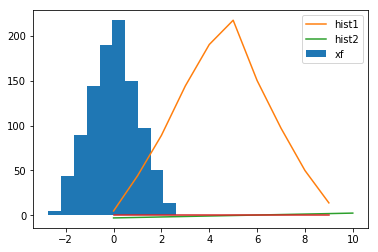

In [14]:
#tf normal distirbution
xt=tf.random_normal([1000])
with tf.Session() as sess:
    tf.global_variables_initializer().run()
    xf=sess.run(xt)
#plt.plot(xf);
plt.hist(xf,label='xf');
plt.plot(np.histogram(xf)[0],label='hist1'); #actual histogram
plt.plot(np.histogram(xf)[1],label='hist2'); #interval edges
plt.plot(np.zeros(10));
plt.legend()
plt.show()

In [15]:
#relu
rand_test=tf.random_normal([11])
with tf.Session() as sess:
    print(sess.run(tf.nn.relu(tf.constant([3.0,-1.0]))))
    print(sess.run([rand_test,tf.nn.relu(rand_test)]))

[3. 0.]
[array([ 0.8609506 , -0.5508698 , -1.5939314 , -0.5930425 , -0.7570683 ,
        0.4917225 ,  1.2102869 , -0.9644545 ,  0.81396276,  0.8768675 ,
        1.6029515 ], dtype=float32), array([0.8609506 , 0.        , 0.        , 0.        , 0.        ,
       0.4917225 , 1.2102869 , 0.        , 0.81396276, 0.8768675 ,
       1.6029515 ], dtype=float32)]


In [16]:
n_nodes_hl1 = 500
n_nodes_hl2 = 500
n_nodes_hl3 = 500

n_classes = 10
batch_size = 100

X = tf.placeholder('float', [None, 784])
Ydata = tf.placeholder('float')

def neural_network_model(X):
    hidden_1_layer = {'weights':tf.Variable(tf.random_normal([784, n_nodes_hl1])),
                      'biases':tf.Variable(tf.random_normal([n_nodes_hl1]))}

    hidden_2_layer = {'weights':tf.Variable(tf.random_normal([n_nodes_hl1, n_nodes_hl2])),
                      'biases':tf.Variable(tf.random_normal([n_nodes_hl2]))}

    hidden_3_layer = {'weights':tf.Variable(tf.random_normal([n_nodes_hl2, n_nodes_hl3])),
                      'biases':tf.Variable(tf.random_normal([n_nodes_hl3]))}

    output_layer = {'weights':tf.Variable(tf.random_normal([n_nodes_hl3, n_classes])),
                    'biases':tf.Variable(tf.random_normal([n_classes])),}


    l1 = tf.add(tf.matmul(X,hidden_1_layer['weights']), hidden_1_layer['biases'])
    l1 = tf.nn.relu(l1)

    l2 = tf.add(tf.matmul(l1,hidden_2_layer['weights']), hidden_2_layer['biases'])
    l2 = tf.nn.relu(l2)

    l3 = tf.add(tf.matmul(l2,hidden_3_layer['weights']), hidden_3_layer['biases'])
    l3 = tf.nn.relu(l3)

    output = tf.matmul(l3,output_layer['weights']) + output_layer['biases']

    return output

def train_neural_network(X):
    Ymod = neural_network_model(X)
    cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=Ymod, labels=Ydata) )
    optimizer = tf.train.AdamOptimizer().minimize(cost)
    
    hm_epochs = 10
    with tf.Session() as sess:
        sess.run(tf.global_variables_initializer())

        for epoch in range(hm_epochs):
            epoch_loss = 0
            for _ in range(int(mnist.train.num_examples/batch_size)):
                epoch_x, epoch_y = mnist.train.next_batch(batch_size)
                _, c = sess.run([optimizer, cost], feed_dict={X: epoch_x, Ydata: epoch_y})
                epoch_loss += c

            print('Epoch', epoch, 'completed out of',hm_epochs,'loss:',epoch_loss)

        correct = tf.equal(tf.argmax(Ymod, 1), tf.argmax(Ydata, 1))

        accuracy = tf.reduce_mean(tf.cast(correct, 'float'))
        print('Accuracy:',accuracy.eval({X:mnist.test.images, Ydata:mnist.test.labels}))

train_neural_network(X)

Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See @{tf.nn.softmax_cross_entropy_with_logits_v2}.

Epoch 0 completed out of 10 loss: 1814826.3556518555
Epoch 1 completed out of 10 loss: 399599.07353782654
Epoch 2 completed out of 10 loss: 239485.88409876823
Epoch 3 completed out of 10 loss: 137350.22784757614
Epoch 4 completed out of 10 loss: 84064.72156804055
Epoch 5 completed out of 10 loss: 54389.01516051885
Epoch 6 completed out of 10 loss: 37015.26285100728
Epoch 7 completed out of 10 loss: 29588.45100973494
Epoch 8 completed out of 10 loss: 22324.26003158326
Epoch 9 completed out of 10 loss: 21522.871839657426
Accuracy: 0.9534


In [17]:
n_nodes_hl1 = 500
n_nodes_hl2 = 500
n_nodes_hl3 = 500

n_classes = 10
batch_size = 100

x = tf.placeholder('float', [None, 784])
y = tf.placeholder('float')

def neural_network_model(data):
    hidden_1_layer = {'weights':tf.Variable(tf.random_normal([784, n_nodes_hl1])),
                      'biases':tf.Variable(tf.random_normal([n_nodes_hl1]))}

    hidden_2_layer = {'weights':tf.Variable(tf.random_normal([n_nodes_hl1, n_nodes_hl2])),
                      'biases':tf.Variable(tf.random_normal([n_nodes_hl2]))}

    hidden_3_layer = {'weights':tf.Variable(tf.random_normal([n_nodes_hl2, n_nodes_hl3])),
                      'biases':tf.Variable(tf.random_normal([n_nodes_hl3]))}

    output_layer = {'weights':tf.Variable(tf.random_normal([n_nodes_hl3, n_classes])),
                    'biases':tf.Variable(tf.random_normal([n_classes])),}


    l1 = tf.add(tf.matmul(data,hidden_1_layer['weights']), hidden_1_layer['biases'])
    l1 = tf.nn.relu(l1)

    l2 = tf.add(tf.matmul(l1,hidden_2_layer['weights']), hidden_2_layer['biases'])
    l2 = tf.nn.relu(l2)

    l3 = tf.add(tf.matmul(l2,hidden_3_layer['weights']), hidden_3_layer['biases'])
    l3 = tf.nn.relu(l3)

    output = tf.matmul(l3,output_layer['weights']) + output_layer['biases']

    return output

def train_neural_network(x):
    prediction = neural_network_model(x)
    cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=prediction, labels=y) )
    optimizer = tf.train.AdamOptimizer().minimize(cost)
    
    hm_epochs = 10
    with tf.Session() as sess:
        sess.run(tf.global_variables_initializer())

        for epoch in range(hm_epochs):
            epoch_loss = 0
            for _ in range(int(mnist.train.num_examples/batch_size)):
                epoch_x, epoch_y = mnist.train.next_batch(batch_size)
                _, c = sess.run([optimizer, cost], feed_dict={x: epoch_x, y: epoch_y})
                epoch_loss += c

            print('Epoch', epoch, 'completed out of',hm_epochs,'loss:',epoch_loss)

        correct = tf.equal(tf.argmax(prediction, 1), tf.argmax(y, 1))

        accuracy = tf.reduce_mean(tf.cast(correct, 'float'))
        print('Accuracy:',accuracy.eval({x:mnist.test.images, y:mnist.test.labels}))

train_neural_network(x)

Epoch 0 completed out of 10 loss: 1726790.301574707
Epoch 1 completed out of 10 loss: 414326.28814315796
Epoch 2 completed out of 10 loss: 225333.56244516373
Epoch 3 completed out of 10 loss: 145023.311981034
Epoch 4 completed out of 10 loss: 87469.92254096025
Epoch 5 completed out of 10 loss: 63491.66683602333
Epoch 6 completed out of 10 loss: 40219.441332149414
Epoch 7 completed out of 10 loss: 32213.44969384931
Epoch 8 completed out of 10 loss: 22937.026453024147
Epoch 9 completed out of 10 loss: 19589.49233396165
Accuracy: 0.9508
